In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

* 텐서는 데이터를 담고 있는 다차원 배열에 대한 일반화된 수학적 용어
    * 벡터 계산을 단순화하기 위해 여러 같은 성질의 벡터를 한 행렬 안에 표기하고 그것을 단순화하여 표기한 것으로 생각하면 됨
* 텐서 차원을 일반적으로 랭크(rank)라고 합니다.
    * 실수처럼 숫자 하나로 이루어진 스칼라는 랭크 0인 텐서 
    * 벡터는 랭크 1인 텐서 
    * 행렬은 랭크 2인 텐서
    * 사진은 랭크 3인 텐서 

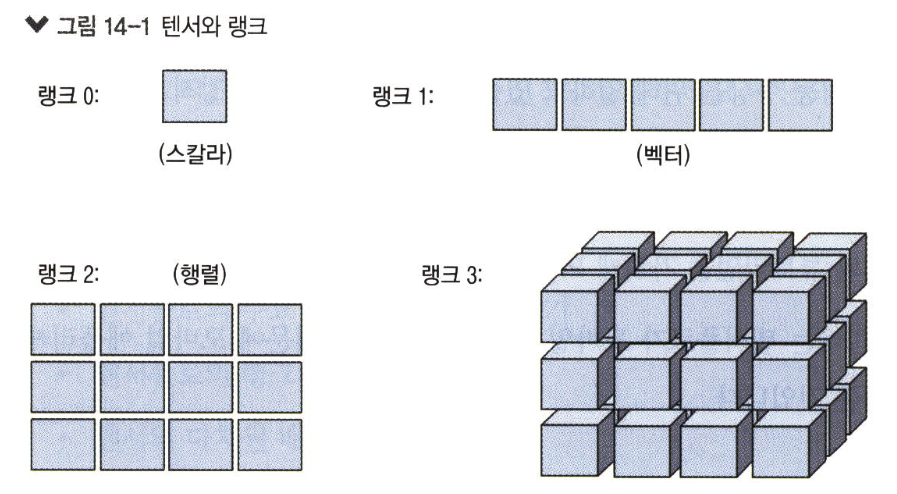

In [2]:
t1 = tf.constant(np.pi) #랭크 0
t2 = tf.constant([1,2,3,4]) #랭크 1
t3 = tf.constant([[1,2], [3,4]]) #랭크 2

In [3]:
# 랭크
r1 = tf.rank(t1)
r2 = tf.rank(t2)
r3 = tf.rank(t3)

In [4]:
# 크기를 구합니다.
s1 = t1.get_shape()
s2 = t2.get_shape()
s3 = t3.get_shape()

In [5]:
print ('크기 : ', s1, s2, s3)

크기 :  () (4,) (2, 2)


In [6]:
print ("랭크 : ", r1.numpy(), r2.numpy(), r3.numpy())

랭크 :  0 1 2


## 텐서를 다차원 배열로 변환

* 일부 연산들은 넘파이 배열 연산과 매우 비슷하게 작동 
* 랭크 2 이상인 텐서를 다룰 대 전치(transpose) 같은 변환은 주의를 기울여야 함 

In [7]:
arr = np.array([[1., 2., 3., 3.5],
                [4., 5., 6., 6.5],
                [7., 8., 9., 9.5]])
T1 = tf.constant(arr)
print(T1)
s = T1.get_shape()
print('T1의 크기:', s)
print('T1의 크기:', T1.shape)

tf.Tensor(
[[1.  2.  3.  3.5]
 [4.  5.  6.  6.5]
 [7.  8.  9.  9.5]], shape=(3, 4), dtype=float64)
T1의 크기: (3, 4)
T1의 크기: (3, 4)


* 텐서플로 2.x에서는 편리하게 TensorShape 객체의 인덱스를 참조하면 스칼라 값이 반환 (이전엔 그래프 그려야했음)

In [9]:
T2 = tf.Variable(np.random.normal(size=s))
print(T2)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float64, numpy=
array([[ 1.44897022,  0.39476832,  0.68288644,  0.14215067],
       [-0.03573337, -1.11003154,  0.36786774,  0.48104331],
       [-1.04479411,  0.85249839, -0.00727551,  0.64855604]])>


In [10]:
T3 = tf.Variable(np.random.normal(size=s[0]))
print(T3)

<tf.Variable 'Variable:0' shape=(3,) dtype=float64, numpy=array([ 2.28457927, -1.40325604, -0.07647842])>


### 텐서의 크기를 변경

In [11]:
T1 #3x4 데이터

<tf.Tensor: shape=(3, 4), dtype=float64, numpy=
array([[1. , 2. , 3. , 3.5],
       [4. , 5. , 6. , 6.5],
       [7. , 8. , 9. , 9.5]])>

In [17]:
T4 = tf.reshape(T1, shape=[1, 1, -1])
print(T4)

print ("=======================")

T5 = tf.reshape(T1, shape=[1, 3, -1]) #마지막 : -1 -> 알아서 해달라(알아서 채워라0 )
print(T5)

tf.Tensor([[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]], shape=(1, 1, 12), dtype=float64)
tf.Tensor(
[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]], shape=(1, 3, 4), dtype=float64)


* 넘파이에는 배열을 전치할 수 있는 방법이 세 가지 존재
    * arr.T
    * arr.transpose()
    * np.transpose(arr)
* 텐서플로에서는 tf.transpose 함수를 사용합니다. 
    * perm=[...]에 원하는 순서대로 차원을 지정하여 바꿀수 있습니다. 

In [15]:
T6 = tf.transpose(T5, perm=[2, 1, 0])
print(T6)

print ("====================")

T7 = tf.transpose(T5, perm=[0, 2, 1])
print(T7)

tf.Tensor(
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]], shape=(4, 3, 1), dtype=float64)
tf.Tensor(
[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]], shape=(1, 4, 3), dtype=float64)


### 텐서 분리

In [18]:
T5

<tf.Tensor: shape=(1, 3, 4), dtype=float64, numpy=
array([[[1. , 2. , 3. , 3.5],
        [4. , 5. , 6. , 6.5],
        [7. , 8. , 9. , 9.5]]])>

In [16]:
t5_splt = tf.split(T5, 
                   num_or_size_splits=2,
                   axis=2) #축 : 2
print(t5_splt)

[<tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[1., 2.],
        [4., 5.],
        [7., 8.]]])>, <tf.Tensor: shape=(1, 3, 2), dtype=float64, numpy=
array([[[3. , 3.5],
        [6. , 6.5],
        [9. , 9.5]]])>]


* 출력 결과는 더 이상 하나의 텐서가 아니라 텐서의 리스트

### 텐서 연결

In [31]:
t1 = tf.ones(shape=(5, 1), dtype=tf.float32)
t2 = tf.zeros(shape=(5, 1), dtype=tf.float32)
print(t1)
print(t2)

print ("========================\n\n")

t3 = tf.concat([t1, t2], axis=0)
print(t3)
print ("----------------")
t4 = tf.concat([t1, t2], axis=1)
print(t4)

tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(5, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


tf.Tensor(
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(10, 1), dtype=float32)
----------------
tf.Tensor(
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]], shape=(5, 2), dtype=float32)


## 텐서플로의 계산 그래프 이해
* 텐서플로 2.x 버전에서는 즉시 실행 모드가 기본으로 활성화되어 있기 때문에 게산 그래프를 만들지 않고 빠르게 개발과 테스트를 할 수 있습니다. 
* 2.x에서 계산 그래프를 만들려면 어떻게 해야하는지 알아보겠습니다. 
* 랭크 0 텐서(스칼라) a, b, c가 있을 때 z = 2 x ( a - b ) + c 를 평가한다고 가정합시다.

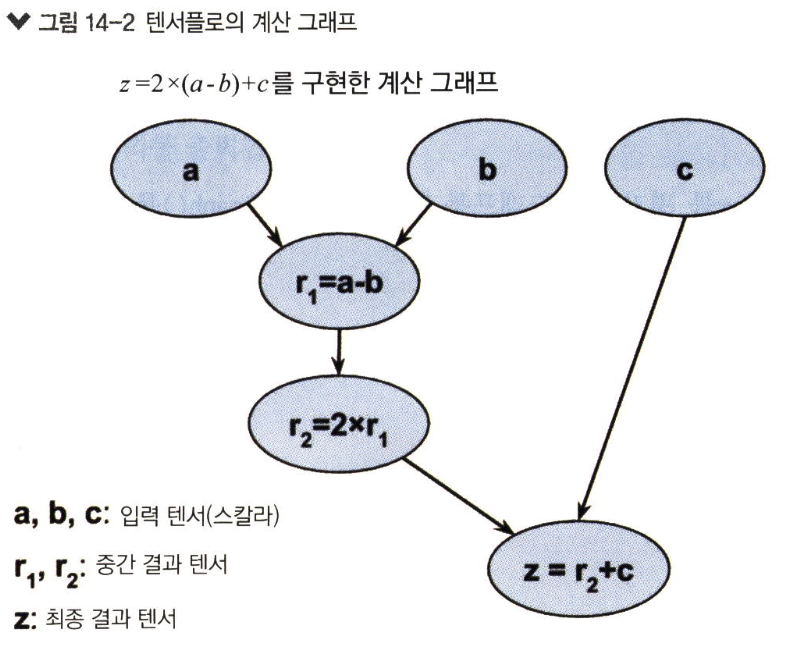

* 계산 그래프는 단순히 노드들의 네트워크입니다. 
* 각 노드는 한 개 이상의 입력 텐서를 받고 0개 이상의 출력 텐서를 반환하는 연산으로 표현할 수 있습니다. 
* 텐서플로 2.x에서는 계산 그래프는 만들지 않고 바로 텐서 z를 계산할 수 있습니다. 

In [32]:
a = tf.constant(1)
b = tf.constant(2) 
c = tf.constant(3) 

z = 2*(a-b) + c

print('2*(a-b)+c => ', z.numpy())

2*(a-b)+c =>  1


* 텐서플로 1.x버전은 계산 그래프를 만든 후 세션을 통해 그래프를 실행합니다. 
    1. 비어 있는 새로운 계산 그래프를 만듭니다.
    2. 계산 그래프에 노드(텐서와 연산)를 추가합니다. 
    3. 그래프를 실행합니다. 
        a. 새로운 세션을 시작합니다. 
        b. 그래프에 있는 변수를 초기화합니다 
        c. 이 세션에서 계산 그래프를 실행합니다. 

In [34]:
## 텐서플로 1.x 방식
g = tf.Graph()
 
## 그래프에 노드를 추가합니다.
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b') 
    c = tf.constant(3, name='c') 

    z = 2*(a-b) + c
    
## 그래프를 실행합니다.
with tf.compat.v1.Session(graph=g) as sess:
    print('2*(a-b)+c => ', sess.run(z))

2*(a-b)+c =>  1


* with g.as_default()를 사용하여 그래프 g에 노드를 추가했습니다. 
* 텐서플로 1.x에서는 명시적으로 그래프를 지정하지 않으면 항상 기본 그래프가 사용됩니다. 
* tf.Session을 호출하여 세션 객체를 만들고 tf.Session(graph=g)처럼 실행할 그래프를 매개변수로 전달합니다. 
* 텐서플로 세션에서 그래프를 적재한 후에는 이 그래프에 있는 노드를 실행할 수 있습니다. 
* 여기서 텐서와 연산을 텐서플로의 계산 그래프 안에 정의했다는 것을 기억하세요. 텐서플로 세션은 그래프에 있는 연산을 실행한 후 결과를 평가하고 추출하기 위해 사용

### 그래프 g에 들어 있는 연산을 출력

In [35]:
g.get_operations()

[<tf.Operation 'a' type=Const>,
 <tf.Operation 'b' type=Const>,
 <tf.Operation 'c' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>]

* 그래프 g의 정의

In [36]:
g.as_graph_def()

node {
  name: "a"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "b"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "c"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "a"
  input: "b"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    ke

#### 텐서플로 2.x 버전에서는 tf.function 데코레이터(decorator)를 사용하여 일반 파이썬 함수를 호출 가능한 그래프 객체로 만듭니다. 
* 마치 tf.Graph와 tf.Session을 합쳐 놓은 것처럼 생각할 수 있습니다.

In [42]:
@tf.function
def simple_func():
    a = tf.constant(1)
    b = tf.constant(2) 
    c = tf.constant(3) 

    z = 2*(a-b) + c
    return z

print('2*(a-b)+c => ', simple_func().numpy())

2*(a-b)+c =>  1


In [43]:
print (simple_func.__class__)

<class 'tensorflow.python.eager.def_function.Function'>


* tf.function으로 감싼 함수 안의 연산은 자동으로 텐서플로 그래프에 포함되어 실행됩니다. 
* 이를 자동 그래프(AutoGraph) 기능이라고 합니다. 

* simple_func가 만든 그래프에 있는 연산과 그래프 정의

In [44]:
con_func = simple_func.get_concrete_function()
con_func.graph.get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'mul/x' type=Const>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'add' type=AddV2>,
 <tf.Operation 'Identity' type=Identity>]

In [45]:
con_func.graph.as_graph_def()

node {
  name: "Const"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 1
      }
    }
  }
}
node {
  name: "Const_1"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 2
      }
    }
  }
}
node {
  name: "Const_2"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 3
      }
    }
  }
}
node {
  name: "sub"
  op: "Sub"
  input: "Const"
  input: "Const_1"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "mul/x"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32

## 텐서플로의 변수 

* 텐서플로에서 변수는 특별한 종류의 텐서 객체입니다. 
* 훈련 과정 동안 모델 파라미터를 저장하고 업데이트할 수 있습니다. 
    * 예를 들어 신경망의 입력층, 은닉층, 출력층에 있는 가중치입니다. 
    * 변수를 정의할 때 초기 텐처 값을 지정해야 합니다. 

In [46]:
# tf.Variable( <initial-value>, name = <optional-name> )

* tf.Variable에는 shape이나 dtype을 설정할 수 없습니다. 크기와 타입은 초깃값과 동일하게 설정됩니다. 
* 텐서플로 1.x에서 변수를 만들고 공유하기 위해 사용했던 tf.get_variable()은 2.x에서 삭제 

* 텐서플로 1.x 형식의 변수

In [47]:
g1 = tf.Graph()

with g1.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
print(w1)

<tf.Variable 'w1:0' shape=(2, 4) dtype=int32>


* 변수 w1은 실제 값이 포함되어 있지 않습니다. 
* g1 그래프에 포함된 연산을 출력해 보면 변수 초깃값(initial_value)과 할당 연산(Assign)이 각각 존재합니다. 

In [48]:
g1.get_operations()

[<tf.Operation 'w1/Initializer/initial_value' type=Const>,
 <tf.Operation 'w1' type=VarHandleOp>,
 <tf.Operation 'w1/IsInitialized/VarIsInitializedOp' type=VarIsInitializedOp>,
 <tf.Operation 'w1/Assign' type=AssignVariableOp>,
 <tf.Operation 'w1/Read/ReadVariableOp' type=ReadVariableOp>]

* 이 변수는 사용하기 전에 초기화를 해 주어야 합니다. 
* 변수 하나씩 초기화 연산을 실행해도 되지만 변수가 많을 경우에는 번거롭습니다. 
* global_variables_initializer() 함수의 역할이 변수 초기화 연산을 한꺼번에 모아 줍니다.

In [49]:
with g1.as_default():
    init = tf.compat.v1.global_variables_initializer()
    print(init.node_def)

name: "init"
op: "NoOp"
input: "^w1/Assign"



In [50]:
with g1.as_default():
    w1 = w1 + 1
    print(w1)
    
with tf.compat.v1.Session(graph=g1) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

Tensor("add:0", shape=(2, 4), dtype=int32)
[[2 3 4 5]
 [6 7 8 9]]
[[2 3 4 5]
 [6 7 8 9]]


* 위의 결과를 보면 w1은 텐서플로 변수가 아니라 덧셈 연산을 가리키는 텐서로 바뀝니다. 
* w1을 여러번 실행하더라도 변수 값이 증가하지 않고 원래 초깃값에 1을 더한 결과만 반복됩니다.
* w1이 그래프에 있는 노드를 참조하는 역할이라고 생각하면 이해하기 쉽습니다. 
* 이를 해결하려면 텐서플로 1.x에는 assign() 메서드를 사용하여 변수 값을 가리키는 연산을 만들어야 합니다. 
* 그 다음 변수를 초기화하고 변수 값을 증가시키는 연산을 실행해야 합니다.

In [51]:
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(np.array([[1, 2, 3, 4],
                              [5, 6, 7, 8]]), name='w1')
    w1 = w1.assign(w1 + 1)

with tf.compat.v1.Session(graph=g2) as sess:
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    print(sess.run(w1))
    print(sess.run(w1))

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


* 텐서플로 2.x에서는 텐서플로 변수가 파이썬 객체 자체이므로 휠씬 다루기 쉽습니다. 

In [56]:
w2 = tf.Variable(np.array([[1, 2, 3, 4],
                          [5, 6, 7, 8]]), name='w2')
print(w2)

<tf.Variable 'w2:0' shape=(2, 4) dtype=int32, numpy=
array([[1, 2, 3, 4],
       [5, 6, 7, 8]])>


* 1.x와 달리 2.x에서는 w2+1처럼 계산이 덧셈 연산의 출력 텐서가 아니라 덧셈이 적용된 상수 텐서를 반환

In [57]:
print(w2 + 1)

tf.Tensor(
[[2 3 4 5]
 [6 7 8 9]], shape=(2, 4), dtype=int32)


* 텐서플로 2.x에서는 변수 값을 증가시키면 이 덧셈 결과를 assign() 메서드로 반복해서 전달하면 됩니다. 

In [58]:
w2.assign(w2 + 1)
print(w2.numpy())
w2.assign(w2 + 1)
print(w2.numpy())

[[2 3 4 5]
 [6 7 8 9]]
[[ 3  4  5  6]
 [ 7  8  9 10]]


## kearas api 

* tensorflow 1.x대에서는 kearas가 함께 들어있지 않아, 다시 설치하거나 해야했지만, tensorflow 2.x대부터는 구글이 kearas를 인수하면서 따로 설치 없이 사용이 가능하게 됨

* y = wx + b인 선형 회귀 모델을 구현하는 것이 목표

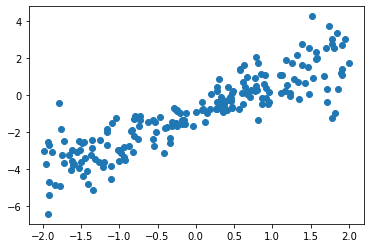

In [62]:
## 랜덤한 회귀용 예제 데이터셋을 만듭니다

np.random.seed(0)

def make_random_data():
    x = np.random.uniform(low=-2, high=2, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, 
                             scale=(0.5 + t*t/3), 
                             size=None)
        y.append(r)
    return  x, 1.726*x -0.84 + np.array(y)


x, y = make_random_data() 

plt.plot(x, y, 'o')
plt.show()

In [63]:
x_train, y_train = x[:150], y[:150]
x_test, y_test = x[150:], y[150:]

In [64]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Epoch 1/300
4/4 [==============================] - 1s 39ms/step - loss: 5.9758 - val_loss: 3.5438
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 4.8592 - val_loss: 3.0497
Epoch 3/300
4/4 [==============================] - 0s 7ms/step - loss: 4.0810 - val_loss: 2.6196
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 3.4067 - val_loss: 2.2643
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 2.8527 - val_loss: 2.0108
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 2.4572 - val_loss: 1.8004
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 2.1354 - val_loss: 1.6227
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 1.8650 - val_loss: 1.4805
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 1.6433 - val_loss: 1.3675
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 1.4669 - val_loss: 1.2750
Epoch 11/300
4/4 [==========

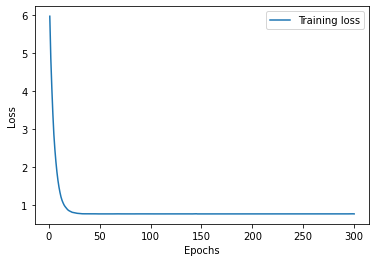

In [67]:
epochs = np.arange(1, 300+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 함수형 api
* 복잡한 모델을 만들대 함수형 api를 사용하면 입력과 출력 사이에 원하는 층을 자유롭게 조합할 수 있습니다. 

In [68]:
input = tf.keras.Input(shape=(1,))
output = tf.keras.layers.Dense(1)(input)

model = tf.keras.Model(input, output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* sequencial 모델은 summary() 메서드 출력에서 나타나지는 않지만 자동으로 InputLayer를 추가

In [69]:
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.3)

Epoch 1/300
4/4 [==============================] - 0s 29ms/step - loss: 4.6956 - val_loss: 2.8306
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 3.8988 - val_loss: 2.4226
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 3.2516 - val_loss: 2.1376
Epoch 4/300
4/4 [==============================] - 0s 7ms/step - loss: 2.7723 - val_loss: 1.8845
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 2.3658 - val_loss: 1.6841
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 2.0449 - val_loss: 1.5528
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 1.8272 - val_loss: 1.4368
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 1.6378 - val_loss: 1.3352
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 1.4646 - val_loss: 1.2443
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 1.3204 - val_loss: 1.1783
Epoch 11/300
4/4 [==========

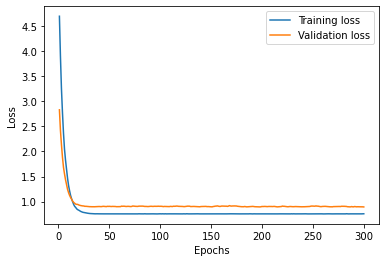

In [70]:
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Keras 모델의 저장과 복원

* 모델 가중치를 save_weights() 메서드로 저장 

In [71]:
model.save_weights('simple_weights.h5') #가중치만 저장했기 때문에 구조를 알아둬야함

* 저장된 가중치를 사용하려면 새로운 모델을 만들고 load_weights() 메서드를 사용하여 가중치를 로드

In [72]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

model.load_weights('simple_weights.h5')

In [73]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 997us/step - loss: 0.9545


0.9544700384140015

* 가중치 외에 모델 전체를 저장할 때는 save() 메서드를 사용하여 가중치와 네트워크 구조까지 HDFS5 포맷으로 저장할 수있습니다 .

In [74]:
model.save('simple_model.h5') #가중치와 구조 한 번에 저장

* 저장된 모델을 로드할려면 load_model() 함수를 사용합니다. 
* 저장된 모델 구조를 그대로 사용하기 때문에 층을 다시 추가할 필요가 없습니다. 

In [75]:
model = tf.keras.models.load_model('simple_model.h5') #load_model : 바로 꺼내쓰기
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 997us/step - loss: 0.9545


0.9544700384140015

#### callback 함수를 사용
* EarlyStopping 콜백 클래스는 기본적으로 검증 손실을 모니터링함 
    * patience 매개변수가 지정한 에포크 횟수 동안 모니터링 지표가 개선되지 않으면 훈련을 중지

In [76]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

callback_list = [tf.keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                 monitor='val_loss', save_best_only=True),
                 tf.keras.callbacks.EarlyStopping(patience=5)]
history = model.fit(x_train, y_train, epochs=300, 
                    validation_split=0.2, callbacks=callback_list)

Epoch 1/300
4/4 [==============================] - 0s 29ms/step - loss: 2.7073 - val_loss: 1.4409
Epoch 2/300
4/4 [==============================] - 0s 6ms/step - loss: 2.3765 - val_loss: 1.2981
Epoch 3/300
4/4 [==============================] - 0s 6ms/step - loss: 2.1061 - val_loss: 1.1767
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 1.8771 - val_loss: 1.0839
Epoch 5/300
4/4 [==============================] - 0s 6ms/step - loss: 1.6906 - val_loss: 1.0095
Epoch 6/300
4/4 [==============================] - 0s 6ms/step - loss: 1.5371 - val_loss: 0.9514
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 1.4106 - val_loss: 0.9059
Epoch 8/300
4/4 [==============================] - 0s 6ms/step - loss: 1.3071 - val_loss: 0.8712
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 1.2204 - val_loss: 0.8430
Epoch 10/300
4/4 [==============================] - 0s 6ms/step - loss: 1.1476 - val_loss: 0.8220
Epoch 11/300
4/4 [==========

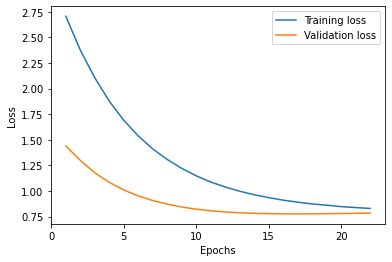

In [77]:
epochs = np.arange(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'], label='Training loss')
plt.plot(epochs, history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* 모델 복원

In [78]:
model = tf.keras.models.load_model('simple_model.h5')
model.load_weights('my_model.h5')
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 997us/step - loss: 1.0284


1.028395652770996

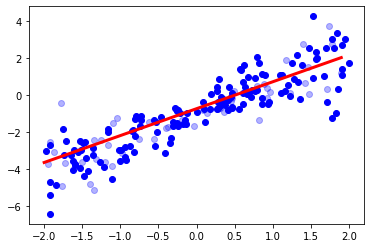

In [79]:
x_arr = np.arange(-2, 2, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_test, y_test, 'bo', alpha=0.3)
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.show()

## 계산 그래프 시각화

* 텐서플로의 놀라운 기능 중 하나는 텐서보드(TensorBoard)입니다. 텐서보드는 모델의 학습 과정뿐만 아니라 계산 그래프도 시각화할 수 있는 모듈입니다. 
* 계산 그래프를 시각화하면 노드 사이 연결을 보고 의존성을 확인하고 필요할 대 모델을 디버깅할 수 있습니다. 

In [80]:
tf.keras.backend.clear_session()

In [81]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [82]:
#실행하면 내가 작업하고 있는 폴더에 파일이 생김 -> 그 파일을 사용해서 TensorBoard를 실행
callback_list = [tf.keras.callbacks.TensorBoard(log_dir='logs')]
model.compile(optimizer='sgd', loss='mse')
history = model.fit(x_train, y_train, epochs=300, 
                    callbacks=callback_list, validation_split=0.3)

Epoch 1/300
4/4 [==============================] - 0s 54ms/step - loss: 1.6564 - val_loss: 1.4082
Epoch 2/300
4/4 [==============================] - 0s 7ms/step - loss: 1.5225 - val_loss: 1.3067
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 1.4063 - val_loss: 1.2168
Epoch 4/300
4/4 [==============================] - 0s 8ms/step - loss: 1.3042 - val_loss: 1.1441
Epoch 5/300
4/4 [==============================] - 0s 7ms/step - loss: 1.2145 - val_loss: 1.0908
Epoch 6/300
4/4 [==============================] - 0s 7ms/step - loss: 1.1456 - val_loss: 1.0453
Epoch 7/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0870 - val_loss: 1.0049
Epoch 8/300
4/4 [==============================] - 0s 7ms/step - loss: 1.0341 - val_loss: 0.9745
Epoch 9/300
4/4 [==============================] - 0s 7ms/step - loss: 0.9904 - val_loss: 0.9486
Epoch 10/300
4/4 [==============================] - 0s 7ms/step - loss: 0.9534 - val_loss: 0.9290
Epoch 11/300
4/4 [==========

* TensorBoard 콜백은 기본적으로 현재 폴더를 만들고 그래프와 손실 값을 저장합니다. 